# Wordclouds

In [5]:
import os
from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read file
text = open(path.join(d, 'szavak.txt')).read()

# display top 5 most frequent words
lista = text.splitlines()

from collections import Counter
szotar = Counter(lista)

import operator
s1 = sorted(szotar.items(), key=operator.itemgetter(1),reverse=True)
s1[0:5]

[('a', 1209), ('az', 324), ('és', 278), ('lakókocsi', 218), ('település', 190)]

### Wordcloud with stopwords

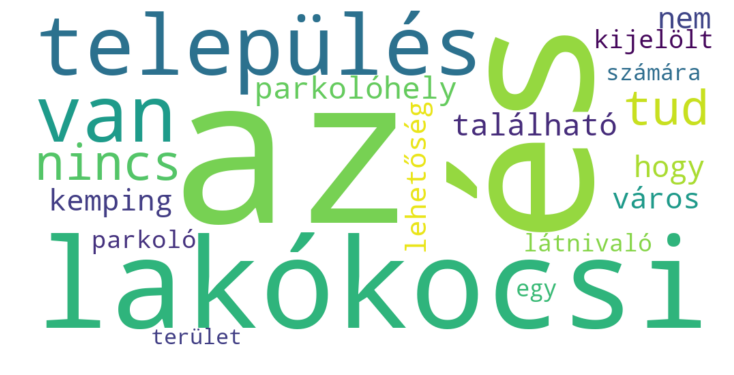

In [8]:
wordcloud = WordCloud(width=1000, height=500, background_color = "white", contour_color="black", max_words = 20,
                     random_state=5, min_font_size = 4, max_font_size = 300, collocations = False,
                      relative_scaling = 0.5).generate(text)

import matplotlib.pyplot as plt
plt.figure( figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig('parkolohely_wordcloud.png')
plt.show()

In [9]:
# Read stop words 
# (available at https://github.com/stopwords-iso/stopwords-hu)

stop =  open(path.join(d, 'stop-words_2.txt'),encoding='utf-8').read()
s_szavak = stop.splitlines()
s_szavak += "a" # adjuk hozza "a"-t
lista_short = [x for x in lista if x not in s_szavak]

szotar_short = Counter(lista_short)

s2 = sorted(szotar_short.items(), key=operator.itemgetter(1),reverse=True)

str1 = ''.join(lista_short)

# mentsuk el

with open('szavak_rovid.txt', 'w') as f:
    for item in lista_short:
        f.write("%s\n" % item) # elmentve

### Wordcloud without stopwords

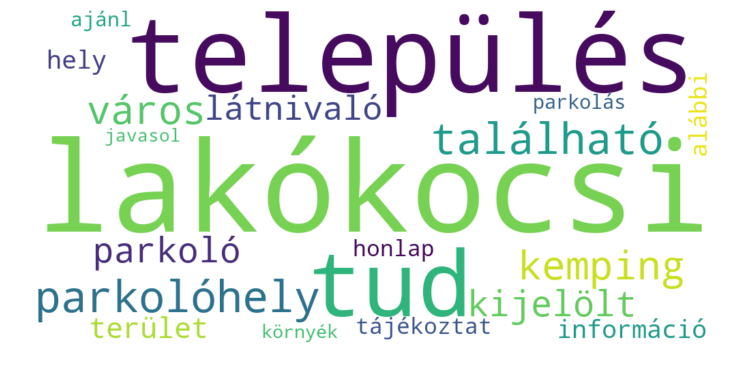

In [10]:
# Wordcloud stop szavak nelkul

text = open(path.join(d, 'szavak_rovid.txt')).read()


wordcloud = WordCloud(width=1000, height=500, background_color = "white", contour_color="black", max_words = 20,
                     random_state=5, min_font_size = 4, max_font_size = 300, collocations = False,
                      relative_scaling = 0.8).generate(text)

import matplotlib.pyplot as plt
plt.figure( figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig('parkolohely_wordcloud_stop_nelkul.png')
plt.show()